In [2]:
import xarray as xr
import now
import numpy as np
import time
from datetime import date
from matplotlib import pyplot as plt
from dask.distributed import LocalCluster, Client
import dask as da
import marineHeatWaves as mhw
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
localDir = "/g/data1a/e14/rm6294/NOWMHW/orig/"
cluster = LocalCluster(processes=False, local_dir="/g/data1a/e14/rm6294/dask-workers")
client = Client(cluster)
client

/g/data1/e14/rm6294/miniconda3/envs/now-postprocess/lib/python3.6/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: inproc://10.0.64.22/29248/1 Dashboard: http://localhost:44846/status,Cluster Workers: 1 Cores: 8 Memory: 33.67 GB


In [5]:
pastClim = xr.open_dataarray(localDir + '/pastClim.nc')
pastThresh = xr.open_dataarray(localDir + '/pastThresh.nc')
futureClim = xr.open_dataarray(localDir + '/futureClim.nc')
futureThresh = xr.open_dataarray(localDir + '/futureThresh.nc')

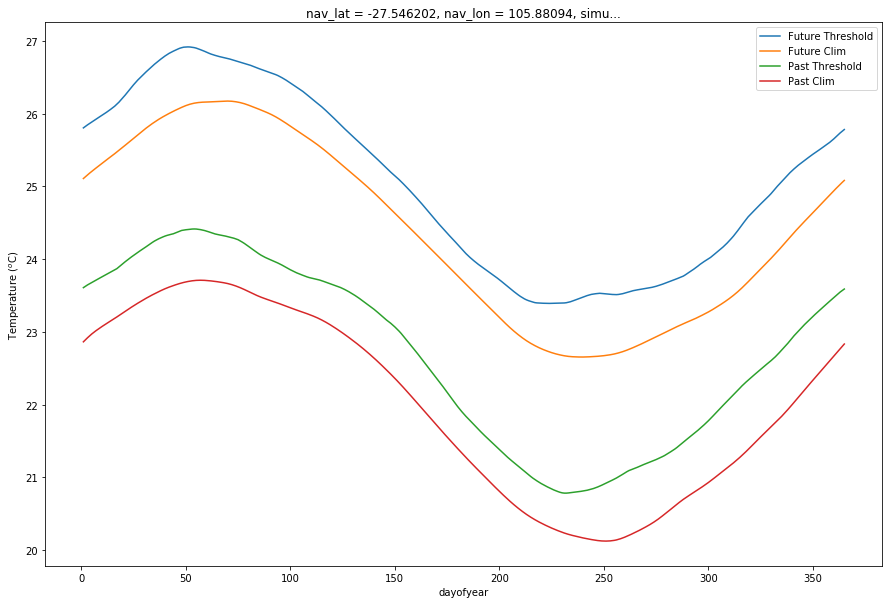

In [13]:
xp = 50; yp = 100
futureThresh.isel(x = xp, y = yp).plot(size = 10, label = 'Future Threshold')
futureClim.isel(x = xp, y = yp).plot(label = 'Future Clim')
pastThresh.isel(x = xp, y = yp).plot(label = 'Past Threshold')
pastClim.isel(x = xp, y = yp).plot(label = 'Past Clim')
ylabel('Temperature ($^o$C)')
legend();

In [14]:
sst_reshaped = xr.open_zarr('/g/data1/e14/gs9353/POST-PROCESS/MHWs/SST_per_dayofyear_Present_vs_Future_50x50.zarr')['tos'].sel(simulation='Present')
sst_reshaped

<xarray.DataArray 'tos' (dayofyear: 427, year: 19, y: 289, x: 431)>
dask.array<shape=(427, 19, 289, 431), dtype=float32, chunksize=(427, 19, 50, 50)>
Coordinates:
  * dayofyear   (dayofyear) int64 -30 -29 -28 -27 -26 ... 392 393 394 395 396
    nav_lat     (y, x) float32 dask.array<shape=(289, 431), chunksize=(50, 50)>
    nav_lon     (y, x) float32 dask.array<shape=(289, 431), chunksize=(50, 50)>
    simulation  <U7 'Present'
  * year        (year) int64 1990 1991 1992 1993 1994 ... 2005 2006 2007 2008
Dimensions without coordinates: y, x
Attributes:
    interval_operation:  360s
    interval_write:      1d
    long_name:           sea_surface_temperature
    online_operation:    average
    units:               degC